In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import scipy
from sklearn.cluster import KMeans

In [2]:
pemsd=np.load('pems-bay/dataset.npy')
print(pemsd.shape)
count=np.unique(pemsd[:,:,0],return_counts=False)
print(count)
count=np.unique(pemsd[:,:,1],return_counts=False)
print(len(count))
unique,count=np.unique(pemsd[:,:,1],return_counts=True)
data_count=dict(zip(unique,count))
print(data_count)

(52116, 325, 2)
[ 5.   5.1  5.2 ... 84.4 84.8 85.1]
288
{0.0: 58825, 0.003472222222222222: 58825, 0.006944444444444444: 58825, 0.010416666666666666: 58825, 0.013888888888888888: 58825, 0.017361111111111112: 58825, 0.020833333333333332: 58825, 0.024305555555555556: 58825, 0.027777777777777776: 58825, 0.03125: 58825, 0.034722222222222224: 58825, 0.03819444444444445: 58825, 0.041666666666666664: 58825, 0.04513888888888889: 58825, 0.04861111111111111: 58825, 0.052083333333333336: 58825, 0.05555555555555555: 58825, 0.059027777777777776: 58825, 0.0625: 58825, 0.06597222222222222: 58825, 0.06944444444444445: 58825, 0.07291666666666667: 58825, 0.0763888888888889: 58825, 0.0798611111111111: 58825, 0.08333333333333333: 58825, 0.08680555555555555: 58825, 0.09027777777777778: 58825, 0.09375: 58825, 0.09722222222222222: 58825, 0.10069444444444445: 58825, 0.10416666666666667: 58825, 0.1076388888888889: 58825, 0.1111111111111111: 58825, 0.11458333333333333: 58825, 0.11805555555555555: 58825, 0.121527

In [3]:
sz = np.load('shenzhen/dataset.npy')
sz.shape
szMatrix = np.load('shenzhen/matrix.npy')
count=np.unique(sz[:,:,0],return_counts=False)
print(sz[12][12])
print(sz[14][14])
print(count)
count=np.unique(sz[:,:,1],return_counts=False)
print(count)
# X = np.load(self.data_args[test_data]['dataset_path'])
#             X = X.transpose((1, 2, 0))
#             X = X.astype(np.float32)
#             means = np.mean(X, axis=(0, 2))
#             X = X - means.reshape(1, -1, 1)
#             stds = np.std(X, axis=(0, 2))
#             X = X / stds.reshape(1, -1, 1)

[22.15        0.08333333]
[43.7343      0.09722222]
[  5.        5.00004   5.00017 ... 103.451   103.47    138.9    ]
[0.         0.00694444 0.01388889 0.02083333 0.02777778 0.03472222
 0.04166667 0.04861111 0.05555556 0.0625     0.06944444 0.07638889
 0.08333333 0.09027778 0.09722222 0.10416667 0.11111111 0.11805556
 0.125      0.13194444 0.13888889 0.14583333 0.15277778 0.15972222
 0.16666667 0.17361111 0.18055556 0.1875     0.19444444 0.20138889
 0.20833333 0.21527778 0.22222222 0.22916667 0.23611111 0.24305556
 0.25       0.25694444 0.26388889 0.27083333 0.27777778 0.28472222
 0.29166667 0.29861111 0.30555556 0.3125     0.31944444 0.32638889
 0.33333333 0.34027778 0.34722222 0.35416667 0.36111111 0.36805556
 0.375      0.38194444 0.38888889 0.39583333 0.40277778 0.40972222
 0.41666667 0.42361111 0.43055556 0.4375     0.44444444 0.45138889
 0.45833333 0.46527778 0.47222222 0.47916667 0.48611111 0.49305556
 0.5        0.50694444 0.51388889 0.52083333 0.52777778 0.53472222
 0.54166667

In [4]:
# sz = np.load('shenzhen/matrix.npy')
# sz.shape
pems = np.load('pems-bay/matrix.npy')
print(pems.shape)
unique,count=np.unique(pems,return_counts=True)
data_count=dict(zip(unique,count))
print(data_count)
Matrix = pems

(325, 325)
{0.0: 102931, 0.10002012: 1, 0.10002849: 1, 0.1002047: 1, 0.10059996: 1, 0.100650534: 1, 0.10103861: 1, 0.101114765: 1, 0.101292424: 1, 0.10136019: 1, 0.10158908: 1, 0.10164005: 1, 0.10175049: 1, 0.10224427: 1, 0.102312505: 1, 0.10241496: 1, 0.1024491: 2, 0.10307427: 1, 0.10359885: 1, 0.10385765: 1, 0.10457623: 1, 0.104654424: 1, 0.104767345: 1, 0.104836956: 1, 0.10510685: 1, 0.10525506: 1, 0.105272524: 1, 0.10540347: 1, 0.10542094: 1, 0.10563079: 1, 0.10565699: 1, 0.10569201: 1, 0.1058584: 1, 0.10624457: 1, 0.106270924: 1, 0.10642922: 1, 0.10654369: 1, 0.10659657: 1, 0.10661416: 1, 0.10665824: 1, 0.10694945: 1, 0.10697594: 1, 0.10709971: 1, 0.10754255: 1, 0.10759582: 1, 0.107933454: 1, 0.10794236: 1, 0.10806699: 1, 0.1082809: 1, 0.10856657: 1, 0.10862915: 1, 0.108682826: 1, 0.10901412: 1, 0.10911278: 1, 0.10931033: 1, 0.10954409: 1, 0.10968817: 1, 0.10972419: 1, 0.11015739: 1, 0.11032016: 1, 0.11101861: 1, 0.11139195: 1, 0.111473985: 1, 0.111483134: 1, 0.11257274: 1, 0.1126

325
1113


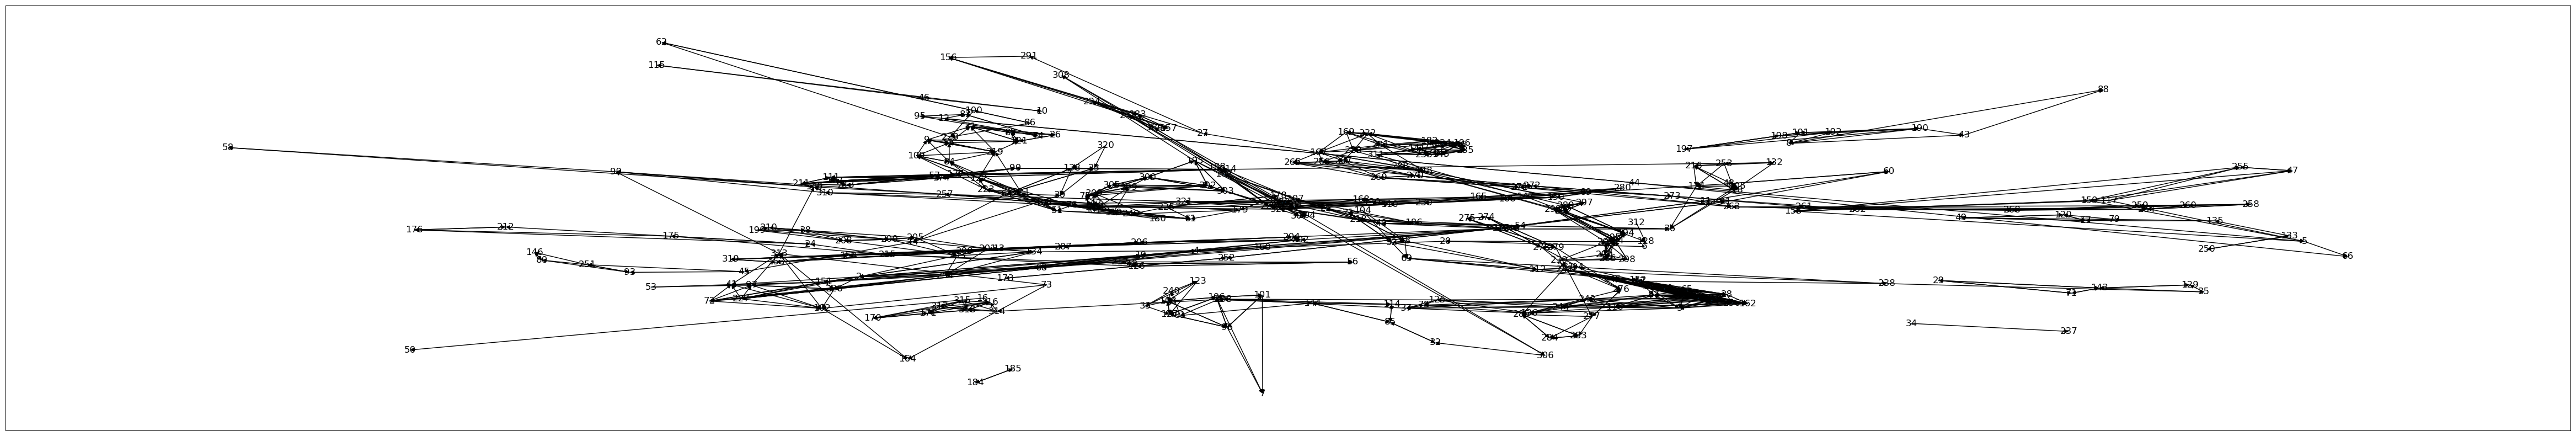

In [6]:
G = nx.DiGraph()
Matrix = pems
MatrixA = Matrix
print(len(Matrix))
plt.figure(figsize=(60, 10))
V=0
for i in range(len(Matrix)):
	for j in range(len(Matrix)):
		if i==j:
			continue
            #continue
		if Matrix[i][j]>0.5:
			G.add_edge(i, j)
			V+=1

print(V)
nx.draw_networkx(G,node_size=0.05,pos=nx.spring_layout(G,iterations = 20))
plt.show()

In [13]:
MatrixA = Matrix
for i in range(len(Matrix)):
	for j in range(len(Matrix)):
        if i==j:
            MatrixA[i][j]=0
        if Matrix[i][j]>0.5:
            MatrixA[i][j]=Matrix[i][j]


In [39]:
def create_diag_matrix(matrix_A):

    #Assign sum of elements across each column to the diagonal of a matrix
    matrix_D = np.diag(np.sum(matrix_A, axis = 1))

    #Return diagonal degree matrix
    return(matrix_D)

def create_norm_laplacian(matrix_D, matrix_A):

    #Determine matrix_L based on the value of determinant of matrix_D (check for singular matrix)
    if np.linalg.det(matrix_D) != 0:
        matrix_D_inv = np.linalg.inv(np.sqrt(matrix_D))
    else:
        matrix_D_inv = np.linalg.pinv(np.sqrt(matrix_D)) # Implicit decomposition of singular vector/matrix to find its inverse

    matrix_L = np.dot(np.dot(matrix_D_inv, matrix_A), matrix_D_inv)

    return(matrix_L)

#Extract the eignevalues (ascending order) and normalized (unit “length”) eigenvectors of L
def extract_eigen_values(matrix_L, max_value_nodes):

    #Calculate eigenvalues and eigenvectors of normalized laplacian matrix
    eigen_values, eigen_vectors = scipy.linalg.eigh(matrix_L)

    #Plot distribution of eigenvalues
    plt.figure(figsize = (15, 7))
    plt.scatter(range(1, max_value_nodes + 1), eigen_values)
    plt.xlabel('Nodes')
    plt.ylabel('Eigenvalues')
    plt.title('Eigenvalues Distribution')
    plt.show()

    return(eigen_values, eigen_vectors)

#Execute K-means algorithm, and save it's result on label to visual clusters
def kmeans( eigen_values, matrix_L):

    #Determine optimal value for number of clusters, k
    k = np.argmin(np.ediff1d(np.flipud(eigen_values))) + 1

    print('\tOptimal value of k is {0}'.format(k))

    #K-means execution
    #kmeans = KMeans(n_clusters = k, random_state = 1234).fit(matrix_L)

    #Store the cluster label(s)
    #cluster_labels = kmeans.labels_

    #Plot clusters
    #plot_graph(nodes, edges, size_of_node, k_val, num_of_iter, cluster_labels)

#Carry out Spectral Clustering algorithm
def spectral_clustering(X, L, max_value_nodes):

    #Extract eigenvector corresponding to second smallest eigenvalue of matrix L, also known as fiedler vector
    fiedler_vector = X[:, 1]

    #Plot the sparsity pattern and sorted fiedler vector
    fig = plt.figure(figsize = (25, 10), dpi= 300, facecolor = 'w', edgecolor = 'k')

    #Plot normalized laplacian matrix values to determine the sparsity pattern in the clusters
    plt.subplot(1, 2, 1)
    plt.spy(L)
    plt.title('Sparsity Pattern')

    #Plot fiedler vector values to identify possible clusters
    plt.subplot(1, 2, 2)
    plt.scatter(range(1, max_value_nodes + 1), np.sort(fiedler_vector))
    plt.xlabel('Nodes')
    plt.ylabel('Fiedler Vector Values')
    plt.title('Fiedler Vector Distribution')

    plt.show()

#Visualize graph
def plot_graph(nodes, edges, size_of_node, k_val, num_of_iter, cluster_labels = 'b'):

    #Initilize networkx graph object
    G = nx.Graph()

    #Store node list in object
    G.add_nodes_from(nodes)

    #Store edge list in object
    G.add_edges_from(edges)

    #Plot networkx graph
    nx.draw(G, node_size = size_of_node, pos = nx.spring_layout(G, k = k_val, iterations = num_of_iter), node_color = cluster_labels, with_labels = False)

    plt.show()



[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]

Step 5: Creating the Diagonal Degree Matrix D...

Step 6: Creating the Normalized Laplacian Matrix L...

Step 7: Extracting eigenvalues in ascending order and corresponding eigenvectors...


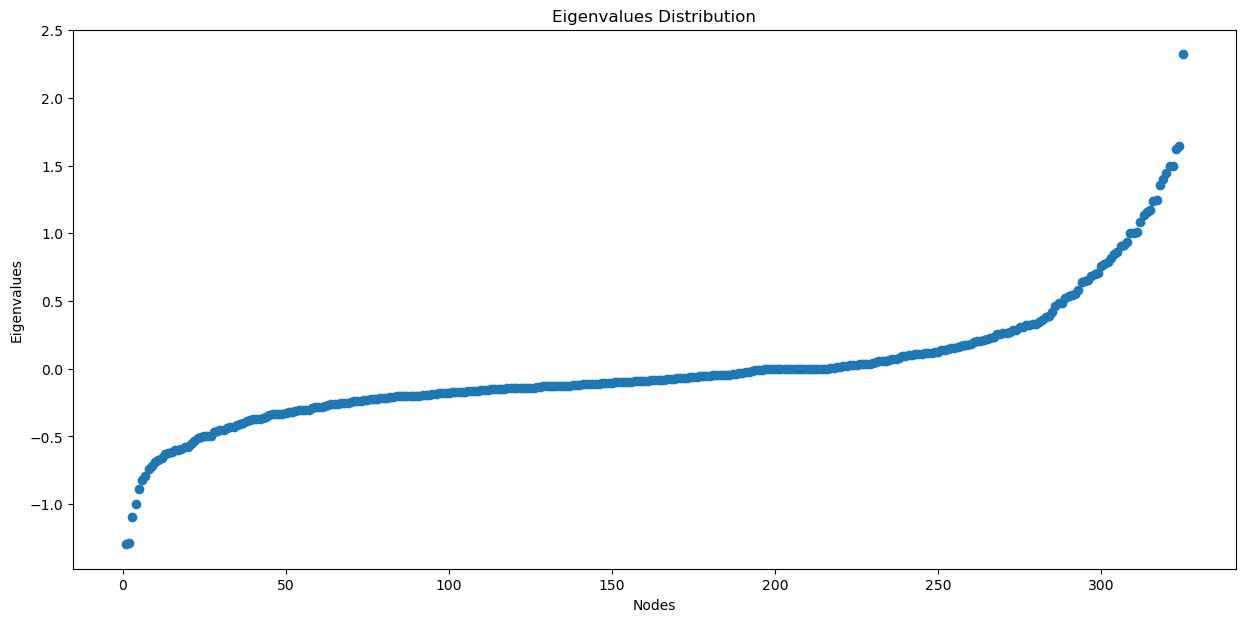


Step 8: Calculating k in K-means algorithm and visualizing clusters using generated labels...
	Optimal value of k is 1


In [40]:
max_value_nodes = 325
matrix_A =Matrix

print('\nStep 5: Creating the Diagonal Degree Matrix D...')
matrix_D = create_diag_matrix(matrix_A)

print('\nStep 6: Creating the Normalized Laplacian Matrix L...')
matrix_L = create_norm_laplacian(matrix_D, matrix_A)

print('\nStep 7: Extracting eigenvalues in ascending order and corresponding eigenvectors...')
w, X = extract_eigen_values(matrix_L, max_value_nodes)

print('\nStep 8: Calculating k in K-means algorithm and visualizing clusters using generated labels...')
kmeans(w, matrix_L)


In [7]:
# Python program to find strongly connected components in a given
# directed graph using Tarjan's algorithm (single DFS)
#Complexity : O(V+E)

from collections import defaultdict

# This class represents an directed graph
# using adjacency list representation


class Graph:

    def __init__(self, vertices):
        # No. of vertices
        self.V = vertices
        self.res=[]

        # default dictionary to store graph
        self.graph = defaultdict(list)

        self.Time = 0

    # function to add an edge to graph
    def addEdge(self, u, v):
        self.graph[u].append(v)

    '''A recursive function that find finds and prints strongly connected
    components using DFS traversal
    u --> The vertex to be visited next
    disc[] --> Stores discovery times of visited vertices
    low[] -- >> earliest visited vertex (the vertex with minimum
                discovery time) that can be reached from subtree
                rooted with current vertex
     st -- >> To store all the connected ancestors (could be part
           of SCC)
     stackMember[] --> bit/index array for faster check whether
                  a node is in stack
    '''

    def SCCUtil(self, u, low, disc, stackMember, st):

        # Initialize discovery time and low value
        disc[u] = self.Time
        low[u] = self.Time
        self.Time += 1
        stackMember[u] = True
        st.append(u)

        # Go through all vertices adjacent to this
        for v in self.graph[u]:

            # If v is not visited yet, then recur for it
            if disc[v] == -1:

                self.SCCUtil(v, low, disc, stackMember, st)

                # Check if the subtree rooted with v has a connection to
                # one of the ancestors of u
                # Case 1 (per above discussion on Disc and Low value)
                low[u] = min(low[u], low[v])

            elif stackMember[v] == True:

                '''Update low value of 'u' only if 'v' is still in stack
                (i.e. it's a back edge, not cross edge).
                Case 2 (per above discussion on Disc and Low value) '''
                low[u] = min(low[u], disc[v])

        # head node found, pop the stack and print an SCC
        w = -1  # To store stack extracted vertices
        if low[u] == disc[u]:
            tmp=[]
            while w != u:
                w = st.pop()
                print(w, end=" ")
                tmp.append(w)
                stackMember[w] = False

            print()
            self.res.append(tmp)

    # The function to do DFS traversal.
    # It uses recursive SCCUtil()

    def SCC(self):

        # Mark all the vertices as not visited
        # and Initialize parent and visited,
        # and ap(articulation point) arrays
        disc = [-1] * (self.V)
        low = [-1] * (self.V)
        stackMember = [False] * (self.V)
        st = []

        # Call the recursive helper function
        # to find articulation points
        # in DFS tree rooted with vertex 'i'
        for i in range(self.V):
            if disc[i] == -1:
                self.SCCUtil(i, low, disc, stackMember, st)

In [10]:
g1 = Graph(325)
for i in range(len(Matrix)):
	for j in range(len(Matrix)):
		if i==j:
			continue
		if Matrix[i][j]>0.2:
			g1.addEdge(i, j)

print("SSC in first graph ")
g1.SCC()
print("SSC list ")
print(g1.res)
# print("Dict")
print(g1.graph)
print(len(g1.res))
degree = np.zeros(len(g1.res))
for i in range(len(g1.res)):
    degree[i] = len(g1.res[i])
degree = np.asarray(degree)
print(degree)
print((degree**-1).shape)

SSC in first graph 
0 
1 
172 70 
58 
149 99 
115 
10 
46 
50 
16 
319 154 153 
209 207 206 204 13 202 
158 
310 
324 257 142 
323 321 181 
322 
168 
130 110 
230 
166 165 
150 
268 264 260 259 258 
261 
263 262 
273 272 271 270 269 
265 
267 266 
148 
167 
229 
231 
232 169 
233 
234 196 182 
312 236 235 145 141 190 244 136 125 317 318 316 315 314 193 78 37 243 88 43 8 191 171 170 254 313 227 226 151 160 72 19 4 20 128 237 164 102 97 41 2 
116 87 
3 
156 
291 
27 
288 
297 294 293 292 289 194 
295 
296 290 286 
298 
239 143 129 71 29 
35 
238 
94 
67 
112 69 
98 52 21 
104 66 
5 
6 
7 
224 183 157 
131 
189 
247 
248 
68 
217 215 126 212 214 213 177 174 253 216 118 124 246 54 218 186 221 222 220 109 219 121 55 84 188 187 107 25 40 36 105 132 137 111 90 57 211 176 175 24 18 56 82 31 26 9 
311 
147 
60 48 
252 173 113 91 11 
255 47 
159 95 155 83 74 12 
146 80 
251 93 
45 
14 
34 
62 
127 108 106 101 96 
123 
228 
33 
240 
81 
144 114 32 85 15 
30 
138 64 23 
320 
120 49 17 
306 
308 
3

In [11]:
coarse_graph= {}
Afc = np.zeros((len(Matrix),len(g1.res)))
for i,nodes in enumerate(g1.res):
    for j in range(len(nodes)):
        Afc[nodes[j]][i] = 1
for i in range(len(g1.res)):
    coarse_graph[i] = g1.res[i]
np.save('Afc.npy',Afc)
# print(coarse_graph)
# pemsd=np.load('pems-bay/dataset.npy')
print(Afc.shape)
X = np.load('pems-bay/dataset.npy')
print(X[0][172])
print(X[0][70])
print('\n')
print(X[1][172])
print(X[1][70])
print('\n')
print(X[2][172])
print(X[2][70])
print('\n')
print(X[3][172])
print(X[3][70])
print('\n')
print(X[4][172])
print(X[4][70])
print('\n')
print(X[5][172])
print(X[5][70])
print('\n')
print(X[6][172])
print(X[6][70])
print('\n')
print(X[7][172])
print(X[7][70])
print('\n')
print(X[8][172])
print(X[8][70])
print('\n')
print(X[9][172])
print(X[9][70])
print('\n')
X = X.transpose((1, 2, 0))
X = X.astype(np.float32)
# means = np.mean(X, axis=(0, 2))
# print(means.shape)
# X = X - means.reshape(1, -1, 1)
# stds = np.std(X, axis=(0, 2))
# X = X / stds.reshape(1, -1, 1)

print(Afc.sum(axis=0).shape)
Afc = Afc/Afc.sum(axis=0)
print(np.unique(Afc))
afc = Afc.T
X = X.reshape(325,-1)
print(afc.shape)
print(X.shape)
pemsd = np.dot(afc,X)
# pemsd = degree**-1*pemsd
print(pemsd.shape)
pemsd = pemsd.reshape(137,2,-1)
print(pemsd[2][0][0])
print(pemsd.shape)
pemsd = pemsd.transpose(2,0,1)
print('pemsd.shape is {}'.format(pemsd.shape))
print(pemsd[0][2])
np.save('Afc1.npy',Afc)
np.save('pemsd_norm.npy',pemsd)
adj_mx_t= Afc.T @ pems @ Afc
print('new shape of adj_mx is {}'.format(adj_mx_t.shape))
np.save('adj_mx_t.npy',adj_mx_t)
# pems = pems.transpose((2, 0, 1))
# print(pemsd.shape)

# for i,interval in enumerate(pemsd):
#     step = (np.matrix(Afc).T)*interval
#     tmp.append(step)
# res = np.asarray(tmp)
# print(f'res.shape is '+str(res[:,:,0].shape))
# print(f'res.shape is '+str(res[:,:,1].shape))

# for i in range(len(res[-1].shape)):
# # res[:,:,0]=res[:,:,0]/degree
# # res[:,:,1]=res[:,:,1]/degree
#     res[:,:,i]=res[:,:,i]/degree
# print(res[0][2])
# for i in res:
#     i=i/degree


(325, 137)
[69.9  0. ]
[67.7  0. ]


[6.99000000e+01 3.47222222e-03]
[6.76000000e+01 3.47222222e-03]


[7.01000000e+01 6.94444444e-03]
[6.78000000e+01 6.94444444e-03]


[7.02000000e+01 1.04166667e-02]
[6.73000000e+01 1.04166667e-02]


[6.92000000e+01 1.38888889e-02]
[6.80000000e+01 1.38888889e-02]


[6.96000000e+01 1.73611111e-02]
[6.74000000e+01 1.73611111e-02]


[7.06000000e+01 2.08333333e-02]
[6.73000000e+01 2.08333333e-02]


[6.96000000e+01 2.43055556e-02]
[6.75000000e+01 2.43055556e-02]


[6.94000000e+01 2.77777778e-02]
[6.72000000e+01 2.77777778e-02]


[7.040e+01 3.125e-02]
[6.690e+01 3.125e-02]


(137,)
[0.         0.02173913 0.02439024 0.16666667 0.2        0.25
 0.33333333 0.5        1.        ]
(137, 325)
(325, 104232)
(137, 104232)
68.79999923706055
(137, 2, 52116)
pemsd.shape is (52116, 137, 2)
[68.79999924  0.        ]
new shape of adj_mx is (137, 137)


In [14]:

g2 = Graph(137)
adj_mx1 = np.identity(137)
for i in range(len(coarse_graph)):
    # select node i in coarse_graph
    # Use the value to
    # check if nodes are connected in fine-grained graph
    # if connected,then the coarse-nodes they belong to should be connected
    for j in range(len(coarse_graph[i])):
        key =coarse_graph[i][j]
        nodes = g1.graph[key]
        for node in nodes:
            for index,nodeList in enumerate(g1.res):
                if node in nodeList and index!=i:
                    g2.addEdge(i, index)
                    adj_mx1[i,index]=1

np.save('adj_mx1.npy',adj_mx1)
for k,v in g2.graph.items():
    g2.graph[k]=list(set(v))
print(g2.graph)

defaultdict(<class 'list'>, {3: [2], 4: [3], 6: [5], 7: [5, 6], 8: [6, 7], 9: [8, 7], 11: [10], 12: [11], 13: [3, 4], 14: [8, 9, 4, 13], 15: [13, 14], 16: [14, 15], 17: [16, 14, 15], 18: [16, 17, 14, 15], 19: [14, 15, 16, 17, 18], 20: [15, 16, 17, 18, 19], 21: [15, 16, 17, 18, 19, 20], 23: [22], 24: [22, 23], 25: [24, 22, 23], 26: [25], 27: [25, 26], 28: [18, 19, 20, 21, 25, 26, 27], 29: [19, 20, 21, 25, 26, 27, 28], 30: [20, 21, 26, 27, 28, 29], 31: [21, 26, 27, 28, 29, 30], 32: [26, 27, 28, 29, 30, 31], 33: [32, 27, 28, 29, 30, 31], 34: [32, 33, 28, 29, 30, 31], 35: [32, 33, 34, 3, 4, 8, 9, 11, 12, 14, 30, 31], 36: [35], 37: [35, 36], 39: [38], 40: [38, 39], 41: [40, 38, 39], 42: [40, 41, 38, 39], 43: [41, 42], 44: [41, 42, 43], 45: [42, 43, 44], 46: [42, 43, 44, 45], 47: [46], 48: [46, 47], 49: [48, 46, 47], 50: [48, 49, 47], 51: [48, 49, 50], 52: [48, 49, 50, 51], 53: [51, 52], 54: [52, 53], 55: [35], 57: [38], 59: [57, 38], 60: [57, 59, 38], 62: [11, 35, 12], 63: [35, 12, 57, 58, 

In [15]:
print("SSC in first graph ")
g2.SCC()
print("SSC list ")
print(g2.res)
# print("Dict")
print(g2.graph)
print(len(g2.res))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Step 5: Creating the Diagonal Degree Matrix D...

Step 6: Creating the Normalized Laplacian Matrix L...

Step 7: Extracting eigenvalues in ascending order and corresponding eigenvectors...


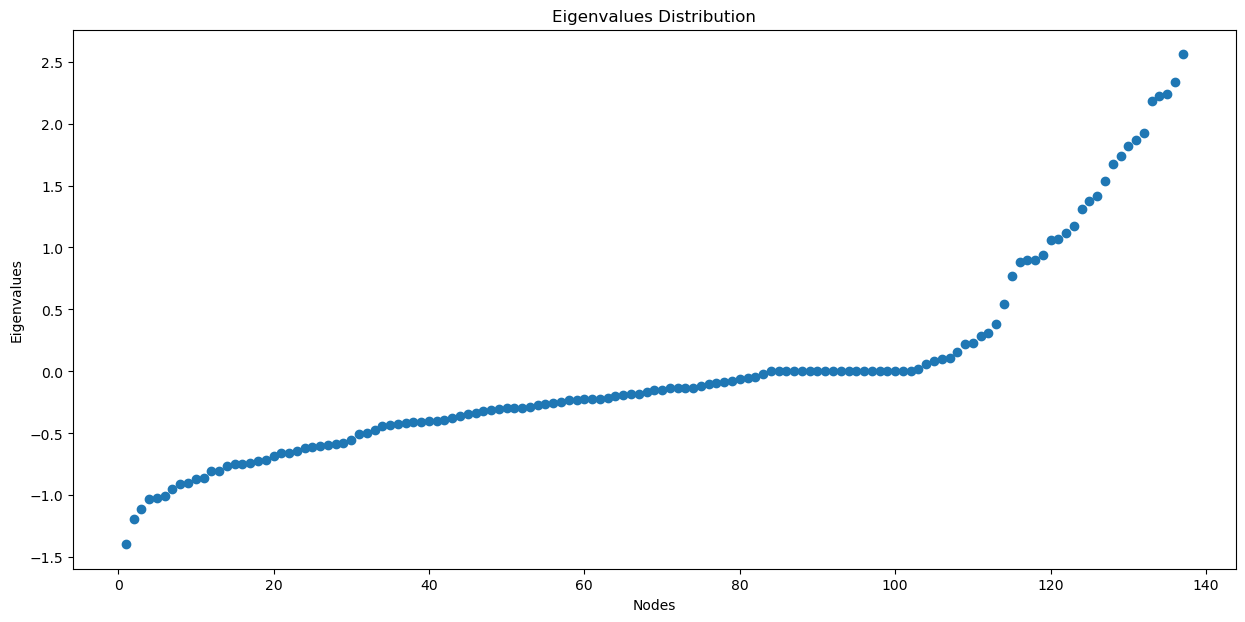


Step 8: Calculating k in K-means algorithm and visualizing clusters using generated labels...
	Optimal value of k is 5


In [16]:
data = np.load('adj_mx_t.npy')
print(data.shape)
print(np.unique(data))